<a href="https://colab.research.google.com/github/paulotolosa/prueba_II_coderhouse/blob/main/Proyecto_ParteII_Tolosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSIGHTS PRELIMINARES
1- Distribución de la variable de resultado ('Outcome'): Comprender la distribución de la variable de resultado ('Outcome') te ayudará a tener una idea inicial de la proporción de pacientes con y sin diabetes en tu conjunto de datos.
2- Distribución de las variables biométricas: Explorar la distribución de variables biométricas como el índice de masa corporal (BMI), la presión arterial y los niveles de glucosa en sangre puede ayudar a identificar patrones y tendencias en los datos que podrían estar asociados con la diabetes.
3- Correlación entre variables: Calcular la matriz de correlación entre las variables numéricas del conjunto de datos te permitirá identificar posibles relaciones lineales entre las variables y cómo se relacionan con la diabetes.
4- Exploración de outliers: Identificar la presencia de outliers en las variables del conjunto de datos puede proporcionar información sobre posibles errores de medición o situaciones inusuales que podrían ser relevantes para tu análisis.
5- Comparación de características entre pacientes con y sin diabetes: Comparar las características (por ejemplo, glucosa en sangre, BMI, presión arterial) entre pacientes con y sin diabetes te permitirá identificar diferencias significativas que podrían estar asociadas con la presencia de la enfermedad.

In [ ]:
import pandas as pd

# URL directa al archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/paulotolosa/prueba_II_coderhouse/main/diabetes.csv'

# Importar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(url)

# Ver las primeras filas del DataFrame para asegurarse de que se importó correctamente
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


Examina las primeras filas para entender el formato de los datos y los tipos de variables presentes

In [ ]:
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Resumen estadístico: Calcula estadísticas descriptivas básicas para cada variable, como la media, la mediana, la desviación estándar, los valores mínimo y máximo

In [ ]:
print(df.describe())


       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min  

Creación de gráficos para visualizar la distribución de cada variable por separado. Por ejemplo, histogramas para variables numéricas y gráficos de barras para variables categóricas. Estas visualizaciones pueden revelar tendencias, patrones y posibles valores atípicos en los datos.

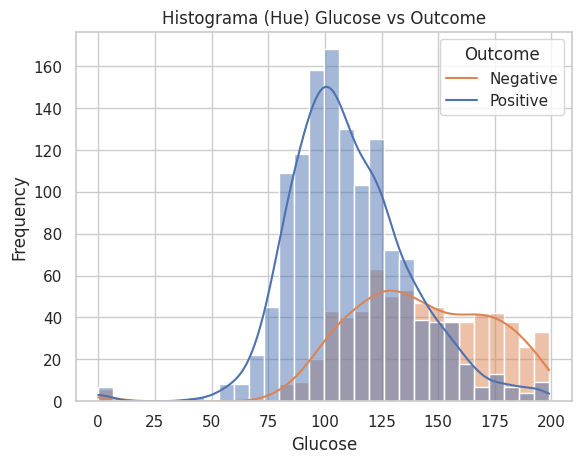

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma con hue entre Glucose y Outcome
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histograma (Hue) Glucose vs Outcome')
plt.legend(title='Outcome', labels=['Negative', 'Positive'])
plt.show()


Graficos en seaborn

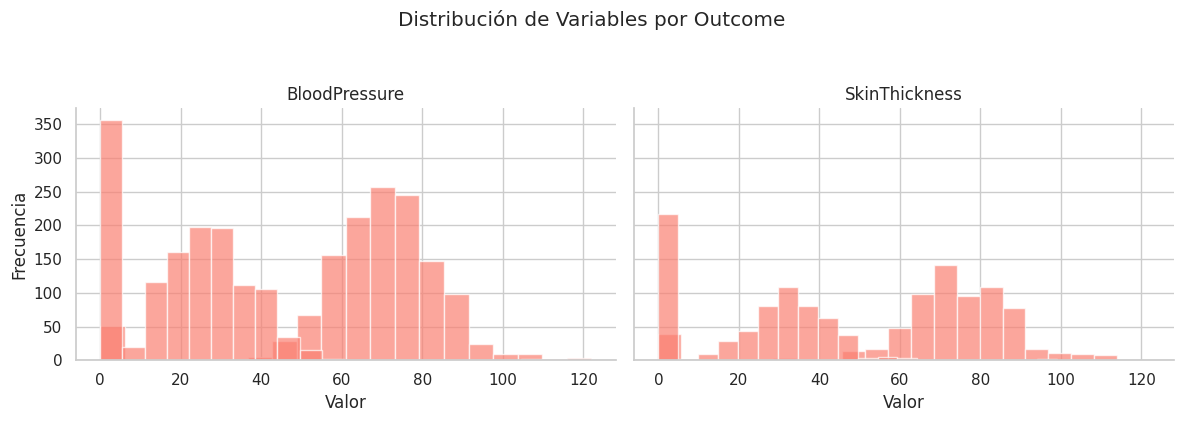

In [28]:
# Seleccionar las variables de interés
variables = ['BloodPressure', 'SkinThickness']

# Configurar el grid con 'Outcome'
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="Outcome", height=4, aspect=1.5)

# Crear histogramas para cada variable en el grid con colores más fuertes y título
for i, var in enumerate(variables):
    for j, ax in enumerate(g.axes.flat):
        if j == i:
            ax.set_title(var)
            g.map(plt.hist, var, bins=20, color="salmon", alpha=0.7)

# Añadir título y etiquetas
g.set_axis_labels("Valor", "Frecuencia")
g.fig.suptitle("Distribución de Variables por Outcome", y=1.05)

plt.tight_layout()
plt.show()





Calcula la matriz de correlación entre las variables numéricas para entender las relaciones lineales entre ellas. Las variables altamente correlacionadas pueden indicar posibles dependencias o redundancias en los datos.

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.120405       0.149672      -0.063375   
Glucose                      0.120405  1.000000       0.138044       0.062368   
BloodPressure                0.149672  0.138044       1.000000       0.198800   
SkinThickness               -0.063375  0.062368       0.198800       1.000000   
Insulin                     -0.076600  0.320371       0.087384       0.448859   
BMI                          0.019475  0.226864       0.281545       0.393760   
DiabetesPedigreeFunction    -0.025453  0.123243       0.051331       0.178299   
Age                          0.539457  0.254496       0.238375      -0.111034   
Outcome                      0.224437  0.458421       0.075958       0.076040   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.076600  0.019475                 -0.025453   
Glucose                   0.320371  0.226

Este código calcula la matriz de correlación entre todas las variables numéricas en el conjunto de datos. Los valores en la matriz de correlación van de -1 a 1, donde:

Un valor cercano a 1 indica una correlación positiva perfecta.
Un valor cercano a -1 indica una correlación negativa perfecta.
Un valor cercano a 0 indica una correlación débil o nula.
Analizando esta matriz, se podrá entender mejor las relaciones lineales entre las variables y detectar posibles dependencias o redundancias en los datos.

Visualización de datos multivariados: relaciones entre pares de variables utilizando gráficos de dispersión o heatmap de correlación para identificar patrones más complejos y entender cómo las variables interactúan entre sí.

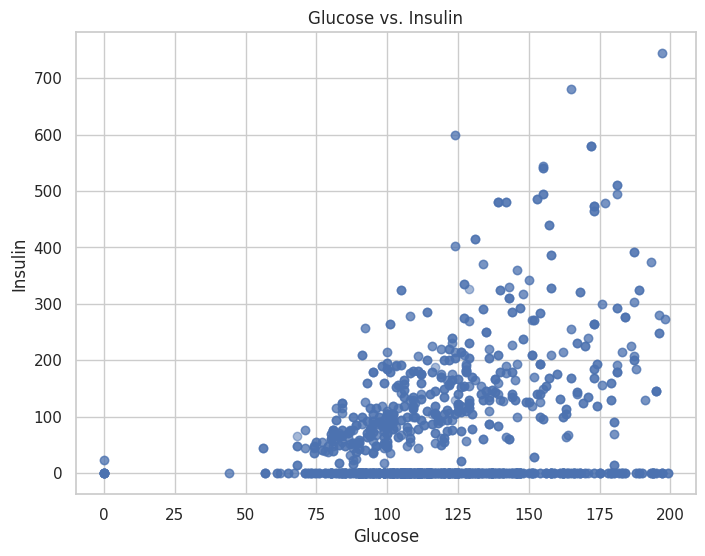

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['Insulin'], alpha=0.5)
plt.title('Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()


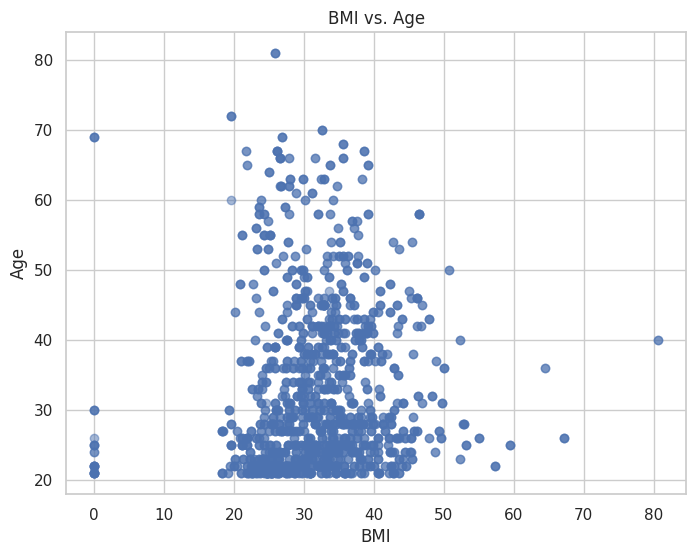

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['Age'], alpha=0.5)
plt.title('BMI vs. Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.grid(True)
plt.show()

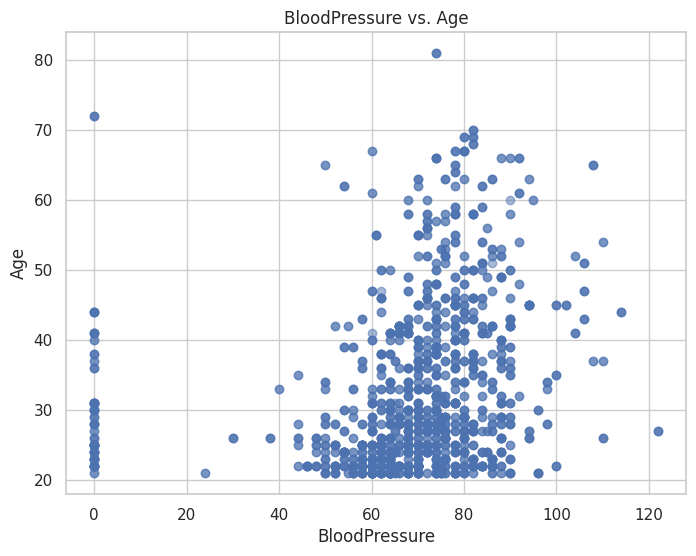

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BloodPressure'], df['Age'], alpha=0.5)
plt.title('BloodPressure vs. Age')
plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.grid(True)
plt.show()


Glucose vs. Insulin: Explorar la relación entre los niveles de glucosa en sangre y los niveles de insulina podría ayudar a comprender cómo interactúan estas dos variables y cómo afectan el metabolismo de la glucosa en el cuerpo.
BMI vs. Age: Investigar la relación entre el índice de masa corporal (IMC) y la edad podría revelar patrones de cómo cambia el IMC con la edad y si hay diferencias en la distribución del IMC entre diferentes grupos de edad.
BloodPressure vs. Age: Examina cómo la presión arterial varía con la edad para entender mejor la relación entre la presión arterial y el envejecimiento.

MATRIZ CORRELACION
Este  heatmap de correlación que muestra la matriz de correlación entre las variables seleccionadas ('Glucose', 'BMI', 'Insulin' y 'Age'). Los valores de correlación se mostrarán como colores en el mapa de calor, lo que facilitará la identificación de patrones y relaciones entre las variables.

Estas visualizaciones te ayudan a comprender mejor cómo interactúan entre sí las variables seleccionadas y a identificar posibles patrones o relaciones complejas en los datos.

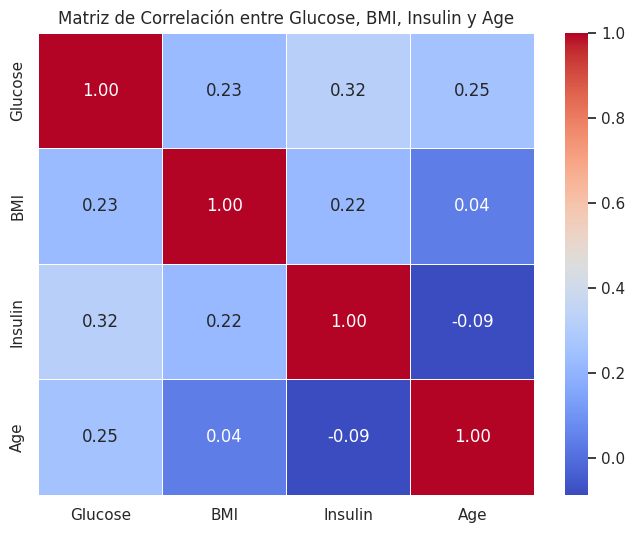

In [ ]:
# Selección de variables
selected_variables = ['Glucose', 'BMI', 'Insulin', 'Age']

# Heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Glucose, BMI, Insulin y Age')
plt.show()


Análisis de valores faltantes: Identifica si hay valores faltantes en el dataset y determina su proporción en cada variable. Esto es importante para decidir cómo manejar los valores faltantes durante el análisis posterior.

In [ ]:
# Identificar valores faltantes
missing_values = df.isnull().sum()

# Calcular la proporción de valores faltantes
missing_proportion = (missing_values / len(df)) * 100

# Mostrar los valores faltantes y su proporción por variable
missing_data = pd.DataFrame({'Valores Faltantes': missing_values, 'Proporción (%)': missing_proportion})
print("Valores faltantes por variable:")
print(missing_data)


Valores faltantes por variable:
                          Valores Faltantes  Proporción (%)
Pregnancies                               0             0.0
Glucose                                   0             0.0
BloodPressure                             0             0.0
SkinThickness                             0             0.0
Insulin                                   0             0.0
BMI                                       0             0.0
DiabetesPedigreeFunction                  0             0.0
Age                                       0             0.0
Outcome                                   0             0.0


No hay faltantes de datos


Exploración de outliers: Busca valores atípicos en el dataset que podrían ser errores de medición o indicativos de situaciones inusuales. Decide si es necesario tratar estos outliers dependiendo del contexto del problema.

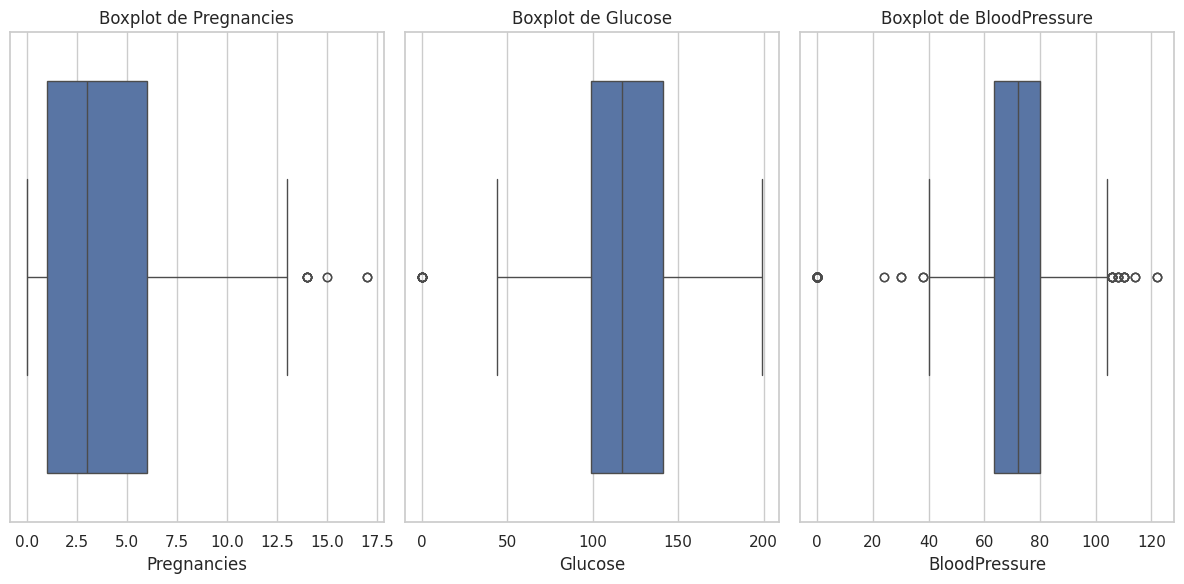

In [ ]:
# Variables de interés
variables = ['Pregnancies', 'Glucose', 'BloodPressure']

# Visualización de boxplots para las variables seleccionadas
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()



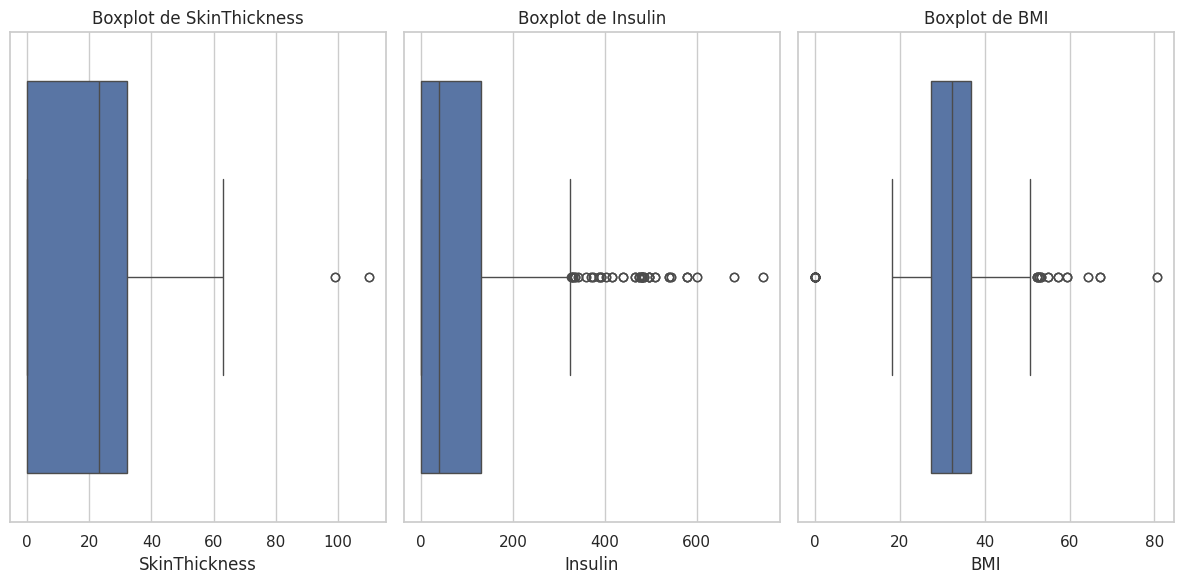

In [ ]:
# Variables de interés
variables = ['SkinThickness', 'Insulin', 'BMI']

# Visualización de boxplots para las variables seleccionadas
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


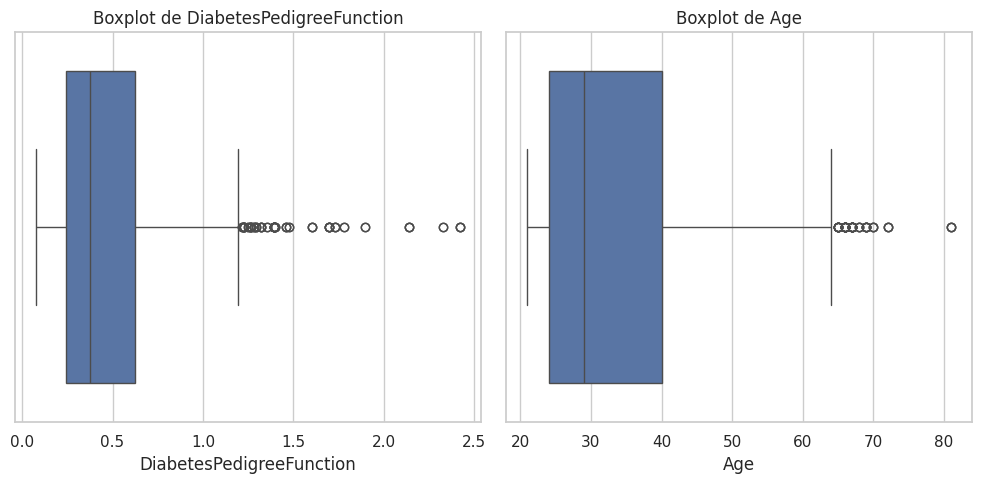

In [ ]:
# Variables de interés
variables = ['DiabetesPedigreeFunction', 'Age']

# Visualización de boxplots para las variables seleccionadas
plt.figure(figsize=(10, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


Decisión sobre tratamiento de outliers:
Al identificar los outliers, debes considerar si son errores de medición o indicativos de situaciones inusuales relevantes para tu análisis.

Errores de medición: Si los outliers son claramente errores de medición, como valores imposibles o extremadamente improbables, podrías considerar eliminarlos o corregirlos si es posible.
Situaciones inusuales relevantes: Si los outliers son datos válidos pero extremos, es importante entender por qué se producen. Podrían ser indicativos de situaciones especiales o de información relevante para tu análisis. En este caso, podrías optar por mantener los outliers y considerar métodos de análisis robustos que puedan manejarlos adecuadamente.
La decisión sobre cómo tratar los outliers dependerá del contexto del problema y de la interpretación de los datos en su contexto específico.

Segmentación de datos: Si es relevante para tu análisis, considera segmentar los datos en grupos o categorías para investigar diferencias y similitudes entre ellos.

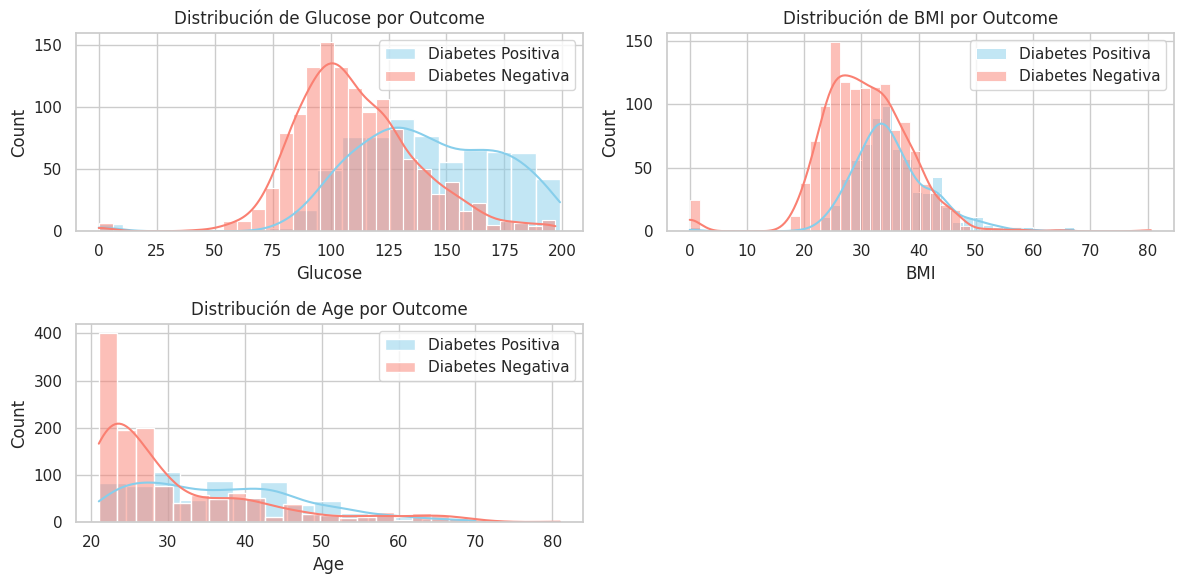

In [ ]:
# Segmentar los datos por el valor de 'Outcome'
diabetes_positive = df[df['Outcome'] == 1]
diabetes_negative = df[df['Outcome'] == 0]

# Comparar distribuciones de variables entre grupos
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(diabetes_positive['Glucose'], color='skyblue', kde=True, label='Diabetes Positiva')
sns.histplot(diabetes_negative['Glucose'], color='salmon', kde=True, label='Diabetes Negativa')
plt.title('Distribución de Glucose por Outcome')
plt.xlabel('Glucose')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(diabetes_positive['BMI'], color='skyblue', kde=True, label='Diabetes Positiva')
sns.histplot(diabetes_negative['BMI'], color='salmon', kde=True, label='Diabetes Negativa')
plt.title('Distribución de BMI por Outcome')
plt.xlabel('BMI')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(diabetes_positive['Age'], color='skyblue', kde=True, label='Diabetes Positiva')
sns.histplot(diabetes_negative['Age'], color='salmon', kde=True, label='Diabetes Negativa')
plt.title('Distribución de Age por Outcome')
plt.xlabel('Age')
plt.legend()

plt.tight_layout()
plt.show()
